In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

0.024576
0.02447816525980669
[6.09514588e-11 1.83470048e-10 3.05988636e-10 4.28507225e-10
 5.51025814e-10 6.73544403e-10 7.96062992e-10 9.18581580e-10
 1.04110017e-09 1.16361876e-09 1.28613735e-09 1.40865594e-09
 1.53117452e-09 1.65369311e-09 1.77621170e-09 1.89873029e-09
 2.02124888e-09 2.14376747e-09 2.26628606e-09 2.38880465e-09
 2.51132324e-09 2.63384182e-09 2.75636041e-09 2.87887900e-09
 3.00139759e-09 3.12391618e-09 3.24643477e-09 3.36895336e-09
 3.49147195e-09 3.61399053e-09 3.73650912e-09 3.85902771e-09
 3.98154630e-09 4.10406489e-09 4.22658348e-09 4.34910207e-09
 4.47162066e-09 4.59413924e-09 4.71665783e-09 4.83917642e-09
 4.96169501e-09 5.08421360e-09 5.20673219e-09 5.32925078e-09
 5.45176937e-09 5.57428796e-09 5.69680654e-09 5.81932513e-09
 5.94184372e-09 6.06436231e-09 6.18688090e-09 6.30939949e-09
 6.43191808e-09 6.55443667e-09 6.67695525e-09 6.79947384e-09
 6.92199243e-09 7.04451102e-09 7.16702961e-09 7.28954820e-09
 7.41206679e-09 7.53458538e-09 7.65710397e-09 7.77962255

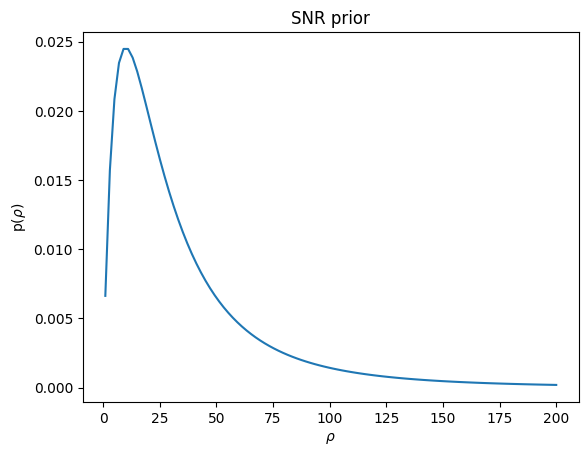

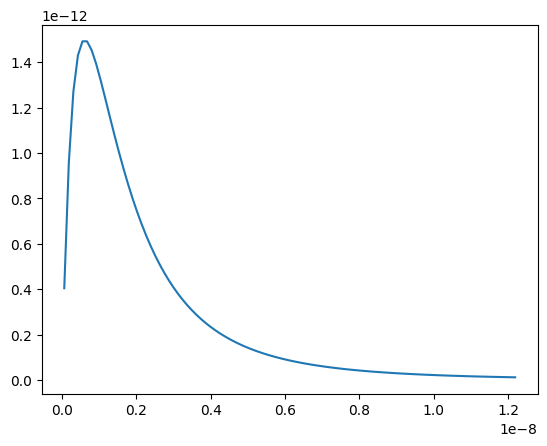

In [36]:
f_min=2e-5
f_star=19.3e-3
phi_star=10


def C_ampSNR(Tobs,f):
    return 1/2*np.sqrt((Tobs*np.sin(f/f_star)/S_A(f)))

def S_A(f): 
    S_acc=(3e-15**2*(1+((0.4e-3)/f)**2))
    S_pos=(15e-12)**2
    return 4*S_pos+8*(1+np.cos(f)**2)*S_acc/(2*np.pi*f)**4
    


def rho(Tobs,f,A):
    return A/2*np.sqrt((Tobs*np.sin(f/f_star)/S_A(f)))



def P_snr(rho):
    return (3*rho)/((4*phi_star**2)*(1+(rho/(4*phi_star)))**5)

def P_A(A,Tobs,f):
    #return P_snr(rho)/rho(Tobs,f,A)
    #return P_snr(rho)*(1/(1/2*np.sqrt((Tobs*np.sin(f/f_star)/S_A(f)))))
    return P_snr(rho)*(1/(C_ampSNR(Tobs,f)))
              
rho=np.linspace(1,200,100)
f=2e-4
T=3.0E7
plt.plot(rho,P_snr(rho))
print(P_snr(10))
print(max(P_snr(rho)))

plt.title('SNR prior')
plt.xlabel(r'$\rho $')
plt.ylabel(r'p($\rho $)')
A=rho*(1/C_ampSNR(T,f))
print(A)
plt.figure()
plt.plot(A,P_A(A,T,f))


#print(P_A(A,T,f))
              